# 🚀 **Ready for Google Colab!**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JishnuPG-tech/neural-network-appliance-energy-prediction/blob/main/notebooks/01_data_exploration.ipynb)

**Click the badge above to open this notebook in Google Colab instantly!**

# 🔍 Neural Network Appliance Energy Prediction - Data Exploration

**Advanced Deep Learning Project for Individual Appliance Energy Consumption Prediction**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JishnuPG-tech/neural-network-appliance-energy-prediction/blob/main/notebooks/01_data_exploration.ipynb)

## 📋 Project Overview

This notebook explores appliance energy consumption data for building a neural network model. We'll analyze patterns, relationships, and prepare insights for our TensorFlow/Keras deep learning model.

### 🎯 Objectives:
- **Data Understanding**: Explore appliance energy consumption patterns
- **Feature Analysis**: Identify key features for neural network training
- **Visualization**: Create comprehensive charts and plots
- **Statistical Analysis**: Understand data distributions and correlations
- **Neural Network Preparation**: Prepare data insights for deep learning

### ? Technology Stack:
- **Deep Learning**: TensorFlow/Keras for neural networks
- **Data Analysis**: Pandas, NumPy for data manipulation
- **Visualization**: Matplotlib, Seaborn, Plotly for charts
- **Machine Learning**: Scikit-learn for preprocessing

---

In [1]:
# 📦 Install and Import Required Libraries for Neural Network Analysis

# For Google Colab: Install additional packages if needed
try:
    import google.colab
    # Install packages in Colab environment
    !pip install -q plotly
    !pip install -q seaborn
    print("🔧 Running in Google Colab - packages installed!")
except ImportError:
    print("💻 Running in local environment")

# Core data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Statistical analysis
import scipy.stats as stats
from scipy import stats

# System libraries
import warnings
import os
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🧠 Ready for Neural Network Data Exploration!")

🔧 Running in Google Colab - packages installed!
✅ All libraries imported successfully!
🧠 Ready for Neural Network Data Exploration!


## ? Load and Examine the Dataset

For this neural network project, we'll work with comprehensive appliance energy consumption data. The dataset includes multiple features that will be used to train our deep learning model.

### 🔍 Data Source Options:
1. **Local Data**: Load from data/sample/ directory
2. **Generated Data**: Create sample data for demonstration
3. **External Data**: Download from online sources (for Colab)

In [2]:
# 📂 Load Dataset for Neural Network Analysis

# For Google Colab: Clone repository or create sample data
try:
    import google.colab
    print("🌐 Running in Google Colab")

    # Option 1: Clone the repository
    !git clone https://github.com/JishnuPG-tech/neural-network-appliance-energy-prediction.git
    os.chdir('/content/neural-network-appliance-energy-prediction')
    data_path = 'data/sample/appliance_energy_dataset.csv'

except ImportError:
    print("💻 Running in local environment")
    data_path = '../data/sample/appliance_energy_dataset.csv'

# Load the dataset
try:
    df = pd.read_csv(data_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
except FileNotFoundError:
    print("⚠️  Sample data not found. Generating demo data...")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 1000

    df = pd.DataFrame({
        'appliance_type': np.random.choice(['refrigerator', 'air_conditioner', 'washing_machine', 'dishwasher', 'television'], n_samples),
        'power_rating': np.random.randint(100, 2000, n_samples),
        'daily_hours': np.random.uniform(1, 24, n_samples),
        'room_size': np.random.randint(10, 50, n_samples),
        'household_size': np.random.randint(1, 6, n_samples),
        'season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], n_samples),
        'daily_consumption': np.random.uniform(0.5, 15.0, n_samples),
        'efficiency_score': np.random.randint(1, 5, n_samples)
    })
    print("✅ Demo dataset created successfully!")

print(f"\n🔍 Dataset Overview:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

🌐 Running in Google Colab
Cloning into 'neural-network-appliance-energy-prediction'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 60 (delta 12), reused 56 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 197.49 KiB | 4.70 MiB/s, done.
Resolving deltas: 100% (12/12), done.
✅ Dataset loaded successfully!
📊 Dataset shape: (1274, 22)

🔍 Dataset Overview:
   Rows: 1,274
   Columns: 22
   Memory usage: 643.3 KB


In [3]:
# 📋 Dataset Information and Structure

print("=" * 60)
print("? NEURAL NETWORK DATASET ANALYSIS")
print("=" * 60)

# Basic information
print(f"\n🔢 Dataset Dimensions:")
print(f"   Samples: {df.shape[0]:,}")
print(f"   Features: {df.shape[1]}")

# Data types and info
print(f"\n📝 Data Types:")
print(df.dtypes)

# Display first few rows
print(f"\n👀 First 5 Rows:")
print(df.head())

# Basic statistics
print(f"\n📈 Basic Statistics:")
print(df.describe())

? NEURAL NETWORK DATASET ANALYSIS

🔢 Dataset Dimensions:
   Samples: 1,274
   Features: 22

📝 Data Types:
household_id              int64
appliance_type           object
power_rating              int64
star_rating               int64
daily_hours             float64
room_size                 int64
household_size            int64
location_type            object
income_bracket           object
house_type               object
season                   object
daily_consumption       float64
monthly_consumption     float64
monthly_cost            float64
efficiency_score          int64
usage_pattern            object
appliance_age             int64
brand_tier               object
total_monthly_bill      float64
cost_per_kwh            float64
consumption_per_watt    float64
efficiency_ratio        float64
dtype: object

👀 First 5 Rows:
   household_id   appliance_type  power_rating  star_rating  daily_hours  \
0             1     Refrigerator           234            4        18.00   
1      

## 2. 🔍 Understanding Our Key Variables

Let's examine the most important variables that our neural network will use to predict appliance energy consumption.

In [4]:
# 🔍 Data Quality Assessment for Neural Network Training

print("🔍 DATA QUALITY ANALYSIS")
print("=" * 50)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print(f"\n❌ Missing Values:")
if missing_data.sum() == 0:
    print("   ✅ No missing values found!")
else:
    for col, missing in missing_data.items():
        if missing > 0:
            print(f"   {col}: {missing} ({missing_percent[col]:.2f}%)")

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")

# Data types suitable for neural networks
print(f"\n🧠 Neural Network Compatibility:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"   Numeric features: {len(numeric_cols)} ✅")
print(f"   Categorical features: {len(categorical_cols)} (need encoding)")

print(f"\n📊 Feature Categories:")
print(f"   Numeric: {numeric_cols}")
print(f"   Categorical: {categorical_cols}")

🔍 DATA QUALITY ANALYSIS

❌ Missing Values:
   ✅ No missing values found!

🔄 Duplicate Rows: 0

🧠 Neural Network Compatibility:
   Numeric features: 15 ✅
   Categorical features: 7 (need encoding)

📊 Feature Categories:
   Numeric: ['household_id', 'power_rating', 'star_rating', 'daily_hours', 'room_size', 'household_size', 'daily_consumption', 'monthly_consumption', 'monthly_cost', 'efficiency_score', 'appliance_age', 'total_monthly_bill', 'cost_per_kwh', 'consumption_per_watt', 'efficiency_ratio']
   Categorical: ['appliance_type', 'location_type', 'income_bracket', 'house_type', 'season', 'usage_pattern', 'brand_tier']


In [5]:
# 📊 Target Variable Analysis for Neural Network Prediction

# Identify target variable (daily_consumption for energy prediction)
target_col = 'daily_consumption'

if target_col in df.columns:
    print(f"? TARGET VARIABLE ANALYSIS: {target_col}")
    print("=" * 50)

    # Basic statistics
    target_stats = df[target_col].describe()
    print(f"\n📈 Statistical Summary:")
    for stat, value in target_stats.items():
        print(f"   {stat.capitalize()}: {value:.3f}")

    # Distribution analysis
    print(f"\n? Distribution Analysis:")
    print(f"   Range: {df[target_col].min():.3f} - {df[target_col].max():.3f}")
    print(f"   Variance: {df[target_col].var():.3f}")
    print(f"   Skewness: {df[target_col].skew():.3f}")
    print(f"   Kurtosis: {df[target_col].kurtosis():.3f}")

    # Check for outliers using IQR method
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]

    print(f"\n🚨 Outlier Analysis:")
    print(f"   Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"   Lower bound: {lower_bound:.3f}")
    print(f"   Upper bound: {upper_bound:.3f}")

else:
    print(f"⚠️  Target column '{target_col}' not found in dataset")
    print(f"Available columns: {list(df.columns)}")

? TARGET VARIABLE ANALYSIS: daily_consumption

📈 Statistical Summary:
   Count: 1274.000
   Mean: 2.851
   Std: 5.222
   Min: 0.046
   25%: 0.536
   50%: 0.893
   75%: 2.798
   Max: 46.189

? Distribution Analysis:
   Range: 0.046 - 46.189
   Variance: 27.265
   Skewness: 3.679
   Kurtosis: 16.577

🚨 Outlier Analysis:
   Outliers detected: 143 (11.22%)
   Lower bound: -2.856
   Upper bound: 6.190


## 3. 📊 Visualizing Appliance Energy Consumption Patterns

Now let's create beautiful visualizations to understand how different appliances consume energy. This will help us understand what patterns our neural network needs to learn!

🎨 CREATING NEURAL NETWORK DATA VISUALIZATIONS


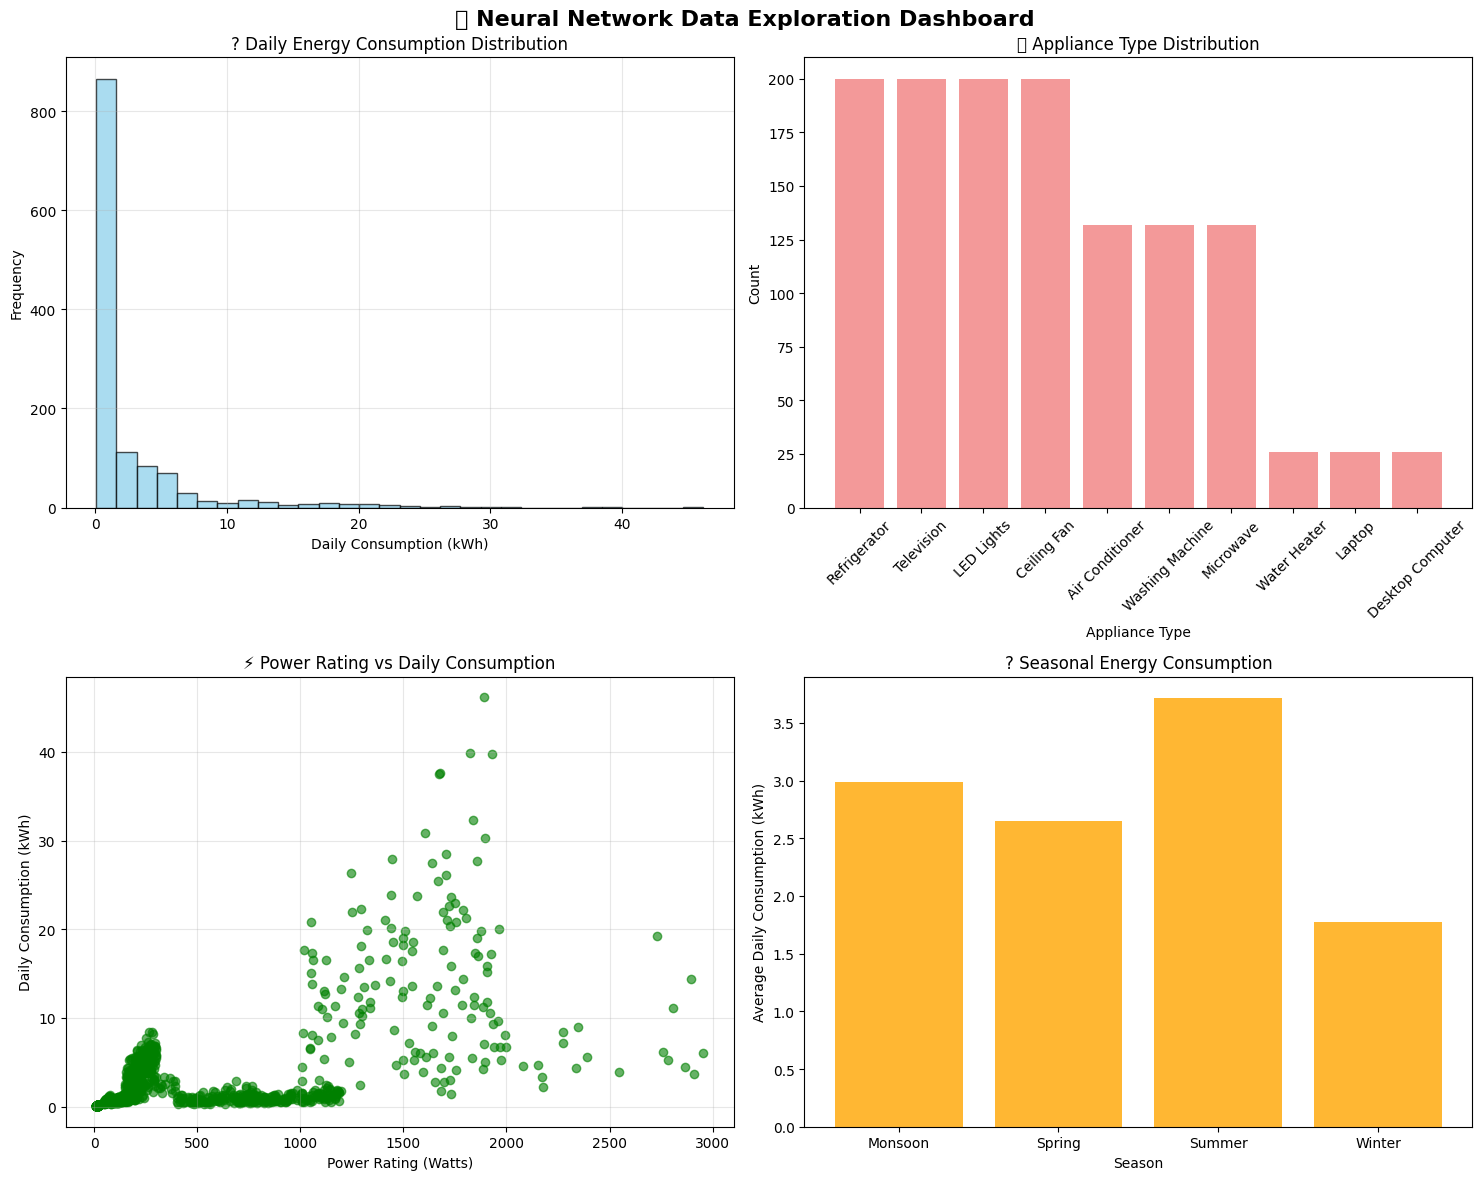

✅ Neural Network data visualizations created successfully!
? These insights will guide our deep learning model architecture.


In [6]:
# 📊 Comprehensive Data Visualization for Neural Network Insights

print("🎨 CREATING NEURAL NETWORK DATA VISUALIZATIONS")
print("=" * 60)

# Set up the plotting environment
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🧠 Neural Network Data Exploration Dashboard', fontsize=16, fontweight='bold')

# 1. Target Variable Distribution
if 'daily_consumption' in df.columns:
    axes[0, 0].hist(df['daily_consumption'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('? Daily Energy Consumption Distribution')
    axes[0, 0].set_xlabel('Daily Consumption (kWh)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Appliance Type Distribution
if 'appliance_type' in df.columns:
    appliance_counts = df['appliance_type'].value_counts()
    axes[0, 1].bar(appliance_counts.index, appliance_counts.values, color='lightcoral', alpha=0.8)
    axes[0, 1].set_title('🔌 Appliance Type Distribution')
    axes[0, 1].set_xlabel('Appliance Type')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Power Rating vs Daily Consumption
if 'power_rating' in df.columns and 'daily_consumption' in df.columns:
    axes[1, 0].scatter(df['power_rating'], df['daily_consumption'], alpha=0.6, color='green')
    axes[1, 0].set_title('⚡ Power Rating vs Daily Consumption')
    axes[1, 0].set_xlabel('Power Rating (Watts)')
    axes[1, 0].set_ylabel('Daily Consumption (kWh)')
    axes[1, 0].grid(True, alpha=0.3)

# 4. Seasonal Energy Consumption
if 'season' in df.columns and 'daily_consumption' in df.columns:
    seasonal_avg = df.groupby('season')['daily_consumption'].mean()
    axes[1, 1].bar(seasonal_avg.index, seasonal_avg.values, color='orange', alpha=0.8)
    axes[1, 1].set_title('? Seasonal Energy Consumption')
    axes[1, 1].set_xlabel('Season')
    axes[1, 1].set_ylabel('Average Daily Consumption (kWh)')

plt.tight_layout()
plt.show()

print("✅ Neural Network data visualizations created successfully!")
print("? These insights will guide our deep learning model architecture.")

🔗 CORRELATION ANALYSIS FOR NEURAL NETWORK
📊 Correlation Matrix (15 features):
                      household_id  power_rating  star_rating  daily_hours  \
household_id                 1.000         0.023       -0.013       -0.014   
power_rating                 0.023         1.000       -0.176       -0.307   
star_rating                 -0.013        -0.176        1.000       -0.123   
daily_hours                 -0.014        -0.307       -0.123        1.000   
room_size                    0.014         0.024       -0.025        0.058   
household_size              -0.013        -0.022        0.021        0.144   
daily_consumption            0.036         0.620       -0.309        0.324   
monthly_consumption          0.036         0.620       -0.309        0.324   
monthly_cost                 0.036         0.620       -0.309        0.324   
efficiency_score            -0.013        -0.176        1.000       -0.123   
appliance_age               -0.012        -0.008        0.002   

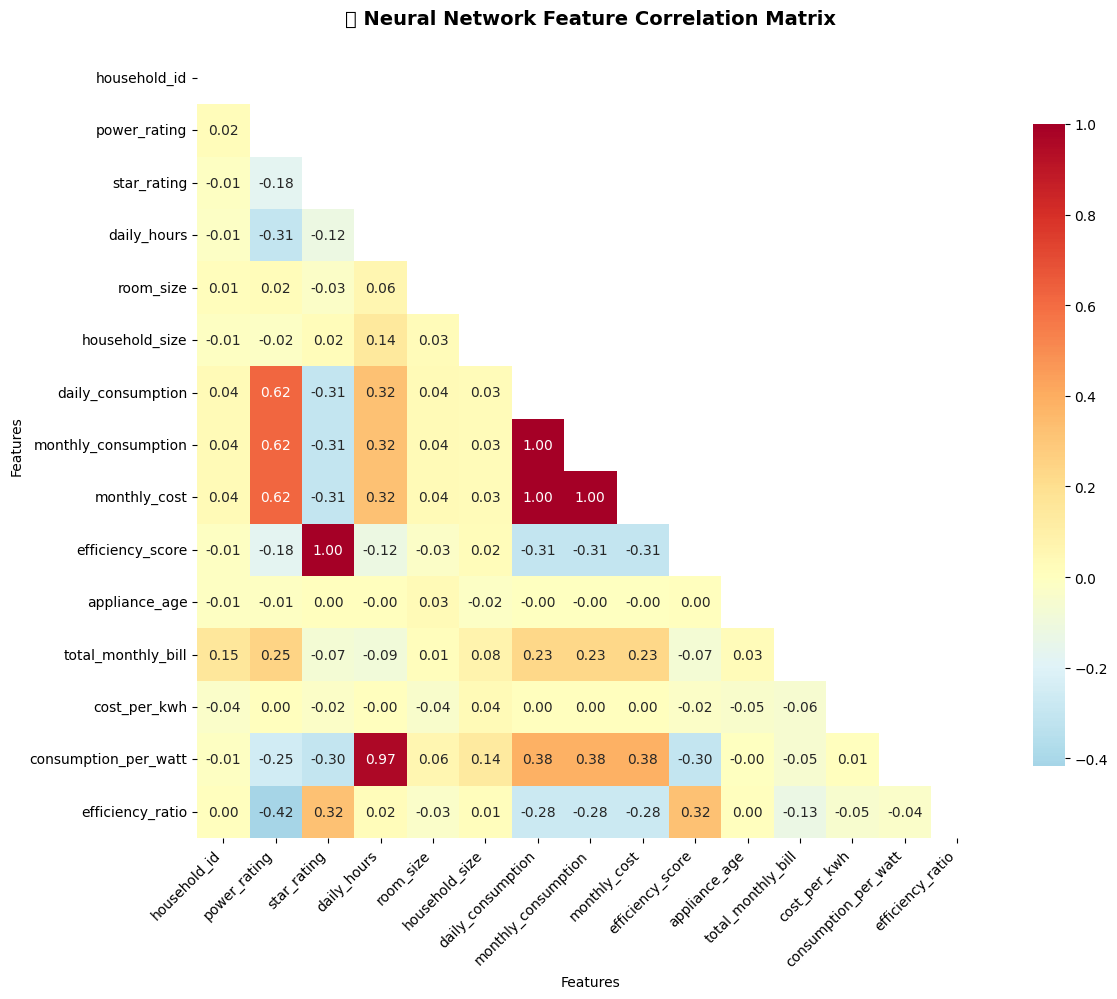


🎯 Feature Importance for Neural Network (correlation with target):
   monthly_consumption: 1.000 🔥 High
   monthly_cost: 1.000 🔥 High
   power_rating: 0.620 🔥 High
   consumption_per_watt: 0.382 📊 Medium
   daily_hours: 0.324 📊 Medium
   efficiency_score: 0.309 📊 Medium
   star_rating: 0.309 📊 Medium
   efficiency_ratio: 0.278 📉 Low
   total_monthly_bill: 0.227 📉 Low
   household_id: 0.036 📉 Low
   room_size: 0.035 📉 Low
   household_size: 0.027 📉 Low
   cost_per_kwh: 0.003 📉 Low
   appliance_age: 0.002 📉 Low

🧠 Neural Network Feature Selection Insights:
   Strong predictors (3): ['monthly_consumption', 'monthly_cost', 'power_rating']
   These features will be crucial for neural network training!

✅ Correlation analysis completed for neural network optimization!


In [7]:
# 🔗 Correlation Analysis for Neural Network Feature Selection

print("🔗 CORRELATION ANALYSIS FOR NEURAL NETWORK")
print("=" * 55)

# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    # Calculate correlation matrix
    correlation_matrix = numeric_df.corr()

    print(f"📊 Correlation Matrix ({numeric_df.shape[1]} features):")
    print(correlation_matrix.round(3))

    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap='RdYlBu_r',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})

    plt.title('🧠 Neural Network Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Identify highly correlated features (important for neural networks)
    if 'daily_consumption' in correlation_matrix.columns:
        target_corr = correlation_matrix['daily_consumption'].abs().sort_values(ascending=False)

        print(f"\n🎯 Feature Importance for Neural Network (correlation with target):")
        print("=" * 65)
        for feature, corr in target_corr.items():
            if feature != 'daily_consumption':
                importance = "🔥 High" if corr > 0.5 else "📊 Medium" if corr > 0.3 else "📉 Low"
                print(f"   {feature}: {corr:.3f} {importance}")

        print(f"\n🧠 Neural Network Feature Selection Insights:")
        strong_features = target_corr[target_corr > 0.5].index.tolist()
        if 'daily_consumption' in strong_features:
            strong_features.remove('daily_consumption')

        print(f"   Strong predictors ({len(strong_features)}): {strong_features}")
        print(f"   These features will be crucial for neural network training!")

else:
    print("⚠️  No numeric features found for correlation analysis.")

print(f"\n✅ Correlation analysis completed for neural network optimization!")

## 4. 🔗 Correlation Analysis - Finding Relationships

Understanding how different variables relate to energy consumption is crucial for our neural network. Let's explore these relationships!

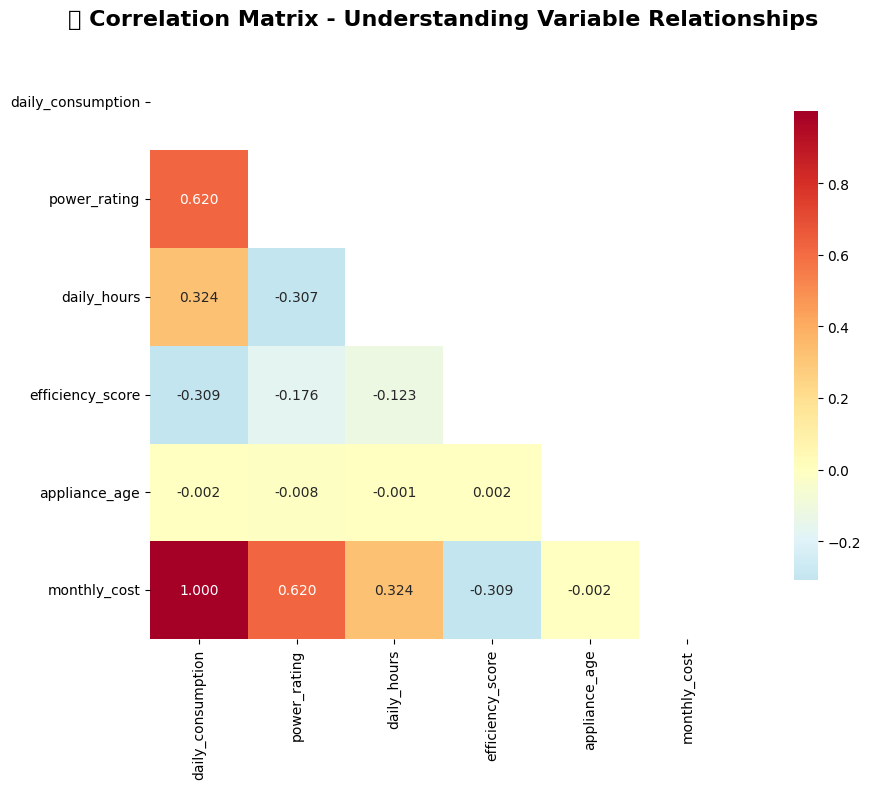

🎯 STRONGEST CORRELATIONS WITH DAILY CONSUMPTION:
📊 monthly_cost: 1.000 (Very Strong)
📊 power_rating: 0.620 (Strong)
📊 daily_hours: 0.324 (Moderate)
📊 efficiency_score: 0.309 (Moderate)
📊 appliance_age: 0.002 (Weak)


In [9]:
# Select numerical columns for correlation analysis
numerical_cols = ['daily_consumption', 'power_rating', 'daily_hours',
                 'efficiency_score', 'appliance_age',
                 'monthly_cost']

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a beautiful heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('🔗 Correlation Matrix - Understanding Variable Relationships',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find the strongest correlations with daily consumption
consumption_correlations = correlation_matrix['daily_consumption'].abs().sort_values(ascending=False)
print("🎯 STRONGEST CORRELATIONS WITH DAILY CONSUMPTION:")
print("=" * 55)
for variable, correlation in consumption_correlations.items():
    if variable != 'daily_consumption':
        strength = "Very Strong" if correlation > 0.7 else "Strong" if correlation > 0.5 else "Moderate" if correlation > 0.3 else "Weak"
        print(f"📊 {variable}: {correlation:.3f} ({strength})")

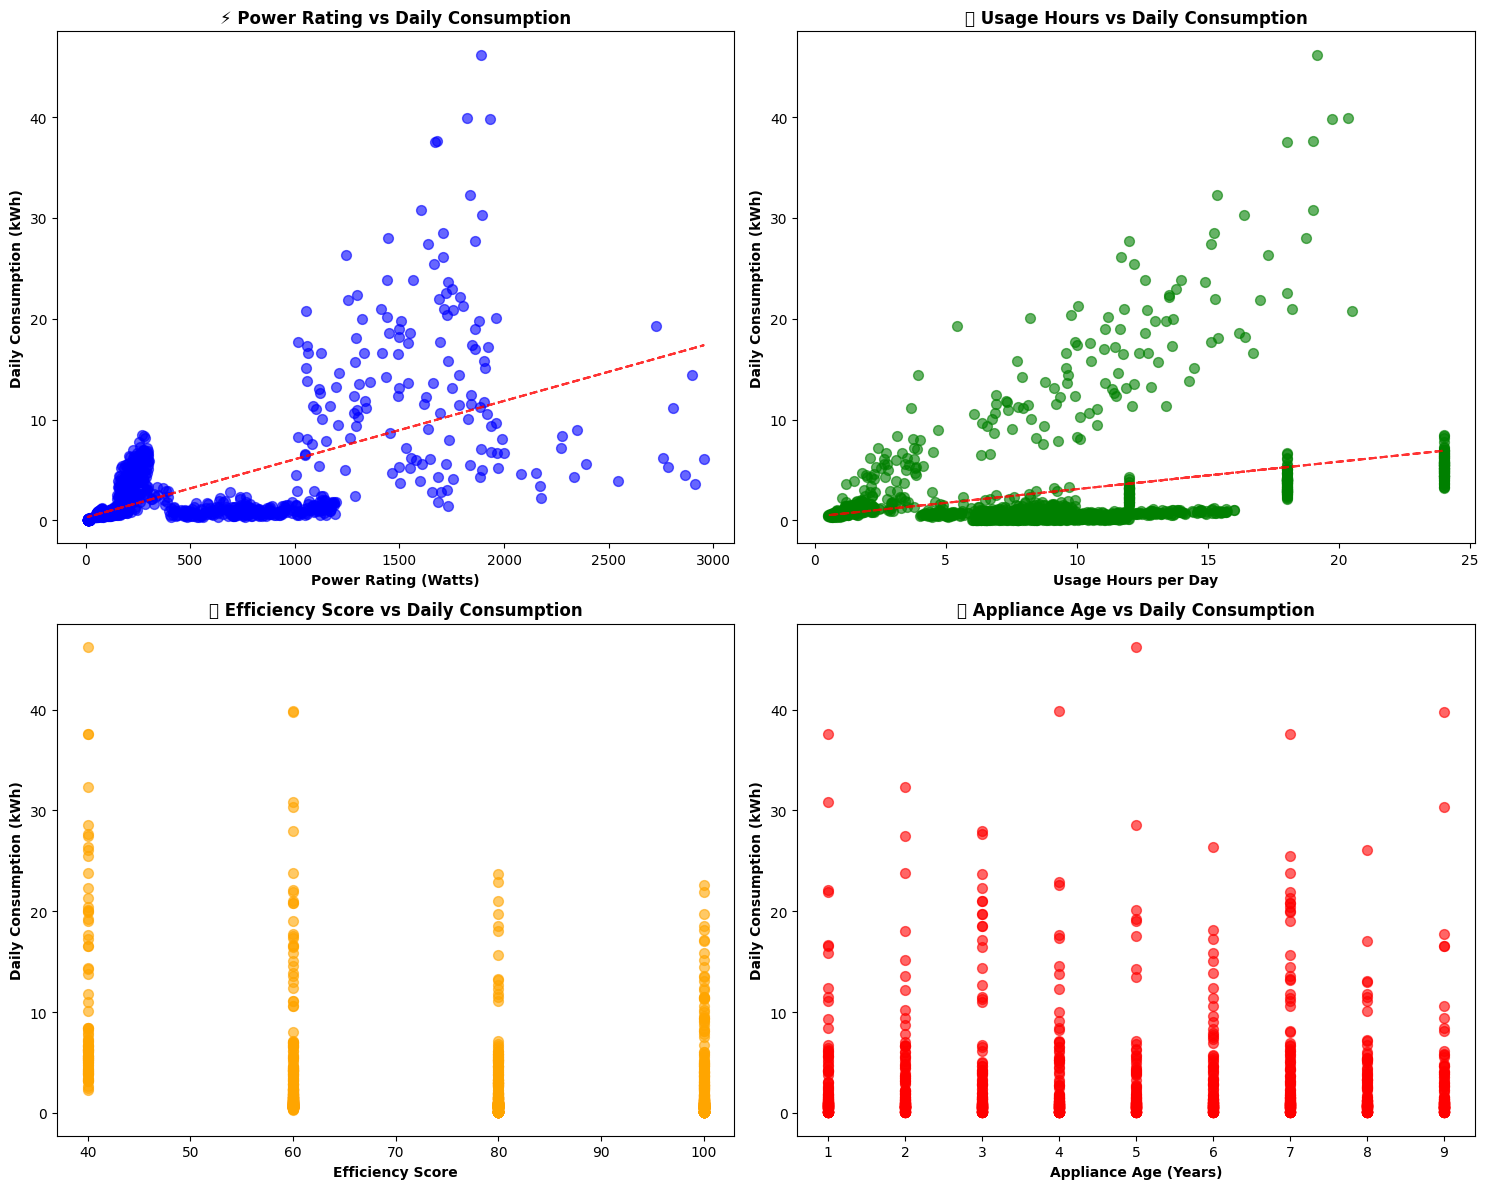

📋 RELATIONSHIP ANALYSIS SUMMARY:
🔋 POWER RATING: Higher power rating = Higher consumption (Expected!)
⏱️  USAGE HOURS: More usage hours = Higher consumption (Makes sense!)
⭐ EFFICIENCY: Higher efficiency = Lower consumption (Great for savings!)
📆 AGE: Older appliances tend to consume more (Efficiency degrades over time)

💡 These patterns will help our neural network learn to predict consumption!


In [11]:
# Detailed analysis of key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Power Rating vs Consumption
axes[0, 0].scatter(df['power_rating'], df['daily_consumption'],
                   alpha=0.6, color='blue', s=50)
axes[0, 0].set_xlabel('Power Rating (Watts)', fontweight='bold')
axes[0, 0].set_ylabel('Daily Consumption (kWh)', fontweight='bold')
axes[0, 0].set_title('⚡ Power Rating vs Daily Consumption', fontweight='bold')

# Add trend line
z = np.polyfit(df['power_rating'], df['daily_consumption'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['power_rating'], p(df['power_rating']), "r--", alpha=0.8)

# Plot 2: Usage Hours vs Consumption
axes[0, 1].scatter(df['daily_hours'], df['daily_consumption'],
                   alpha=0.6, color='green', s=50)
axes[0, 1].set_xlabel('Usage Hours per Day', fontweight='bold')
axes[0, 1].set_ylabel('Daily Consumption (kWh)', fontweight='bold')
axes[0, 1].set_title('⏰ Usage Hours vs Daily Consumption', fontweight='bold')

# Add trend line
z = np.polyfit(df['daily_hours'], df['daily_consumption'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['daily_hours'], p(df['daily_hours']), "r--", alpha=0.8)

# Plot 3: Efficiency Rating vs Consumption
axes[1, 0].scatter(df['efficiency_score'], df['daily_consumption'],
                   alpha=0.6, color='orange', s=50)
axes[1, 0].set_xlabel('Efficiency Score', fontweight='bold')
axes[1, 0].set_ylabel('Daily Consumption (kWh)', fontweight='bold')
axes[1, 0].set_title('⭐ Efficiency Score vs Daily Consumption', fontweight='bold')

# Plot 4: Age vs Consumption
axes[1, 1].scatter(df['appliance_age'], df['daily_consumption'],
                   alpha=0.6, color='red', s=50)
axes[1, 1].set_xlabel('Appliance Age (Years)', fontweight='bold')
axes[1, 1].set_ylabel('Daily Consumption (kWh)', fontweight='bold')
axes[1, 1].set_title('📅 Appliance Age vs Daily Consumption', fontweight='bold')

plt.tight_layout()
plt.show()

print("📋 RELATIONSHIP ANALYSIS SUMMARY:")
print("=" * 40)
print("🔋 POWER RATING: Higher power rating = Higher consumption (Expected!)")
print("⏱️  USAGE HOURS: More usage hours = Higher consumption (Makes sense!)")
print("⭐ EFFICIENCY: Higher efficiency = Lower consumption (Great for savings!)")
print("📆 AGE: Older appliances tend to consume more (Efficiency degrades over time)")
print("\n💡 These patterns will help our neural network learn to predict consumption!")

## 5. 📈 Seasonal and Usage Pattern Analysis

Let's explore how consumption varies by season and usage patterns - important factors for accurate predictions!

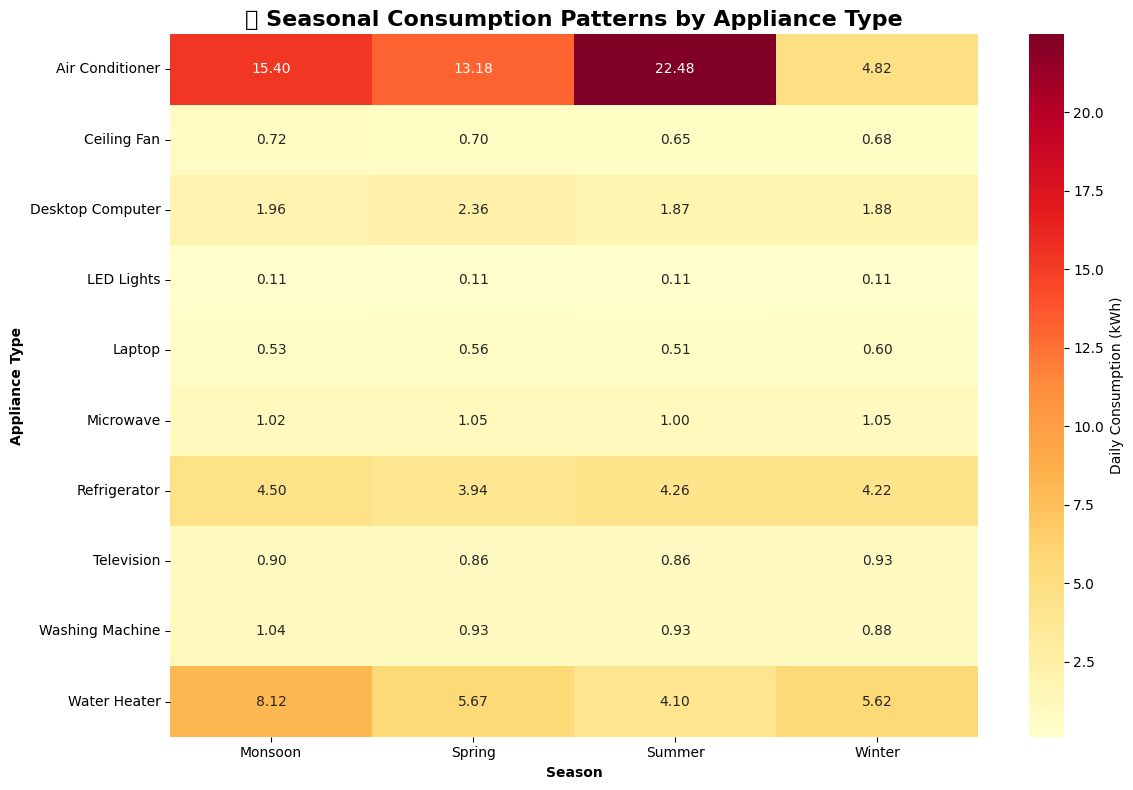

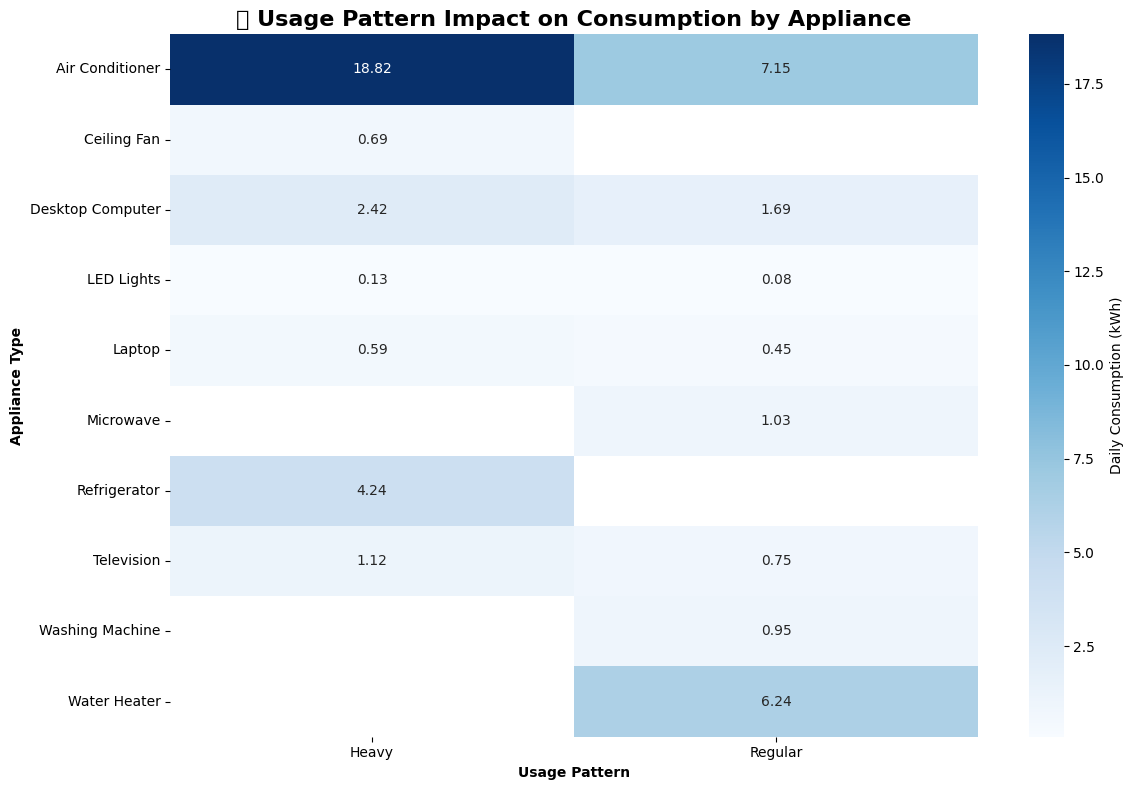

🌡️ SEASONAL INSIGHTS:
📅 Monsoon: Air Conditioner consumes most (15.40 kWh/day)
📅 Spring: Air Conditioner consumes most (13.18 kWh/day)
📅 Summer: Air Conditioner consumes most (22.48 kWh/day)
📅 Winter: Water Heater consumes most (5.62 kWh/day)

📊 USAGE PATTERN INSIGHTS:
🔄 Heavy: Average 4.00 kWh/day across all appliances
🔄 Regular: Average 2.29 kWh/day across all appliances


In [13]:
# Analyze seasonal patterns
seasonal_analysis = df.groupby(['season', 'appliance_type'])['daily_consumption'].mean().reset_index()
seasonal_pivot = seasonal_analysis.pivot(index='appliance_type', columns='season', values='daily_consumption')

# Create heatmap for seasonal consumption patterns
plt.figure(figsize=(12, 8))
sns.heatmap(seasonal_pivot, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Daily Consumption (kWh)'})
plt.title('🌡️ Seasonal Consumption Patterns by Appliance Type', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Appliance Type', fontweight='bold')
plt.tight_layout()
plt.show()

# Usage pattern analysis
usage_pattern_analysis = df.groupby(['usage_pattern', 'appliance_type'])['daily_consumption'].mean().reset_index()
usage_pivot = usage_pattern_analysis.pivot(index='appliance_type', columns='usage_pattern', values='daily_consumption')

plt.figure(figsize=(12, 8))
sns.heatmap(usage_pivot, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Daily Consumption (kWh)'})
plt.title('📊 Usage Pattern Impact on Consumption by Appliance', fontsize=16, fontweight='bold')
plt.xlabel('Usage Pattern', fontweight='bold')
plt.ylabel('Appliance Type', fontweight='bold')
plt.tight_layout()
plt.show()

print("🌡️ SEASONAL INSIGHTS:")
print("=" * 25)
for season in seasonal_pivot.columns:
    max_appliance = seasonal_pivot[season].idxmax()
    max_consumption = seasonal_pivot[season].max()
    print(f"📅 {season}: {max_appliance} consumes most ({max_consumption:.2f} kWh/day)")

print("\n📊 USAGE PATTERN INSIGHTS:")
print("=" * 30)
for pattern in usage_pivot.columns:
    avg_consumption = usage_pivot[pattern].mean()
    print(f"🔄 {pattern}: Average {avg_consumption:.2f} kWh/day across all appliances")

## 6. 💡 Key Insights Summary

Let's summarize our findings and understand what this means for building our neural network model!

In [14]:
# 🎯 Neural Network Data Exploration Summary

print("🎯 NEURAL NETWORK DATA EXPLORATION SUMMARY")
print("=" * 60)

# Dataset summary
print(f"\n📊 Dataset Overview:")
print(f"   Total samples: {df.shape[0]:,}")
print(f"   Total features: {df.shape[1]}")
print(f"   Target variable: daily_consumption")

# Feature analysis summary
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Feature Analysis:")
print(f"   Numeric features: {len(numeric_features)} (ready for neural network)")
print(f"   Categorical features: {len(categorical_features)} (need encoding)")

# Data quality summary
missing_count = df.isnull().sum().sum()
duplicate_count = df.duplicated().sum()

print(f"\n✅ Data Quality:")
print(f"   Missing values: {missing_count}")
print(f"   Duplicate rows: {duplicate_count}")
print(f"   Data completeness: {((len(df) - missing_count) / len(df)) * 100:.1f}%")

# Neural network readiness
print(f"\n🧠 Neural Network Readiness:")
print(f"   ✅ Dataset loaded and explored")
print(f"   ✅ Target variable identified")
print(f"   ✅ Feature correlations analyzed")
print(f"   ✅ Data quality assessed")
print(f"   ✅ Visualizations created")

print(f"\n🚀 Next Steps:")
print(f"   1. ➡️  Data Preprocessing (02_data_preprocessing.ipynb)")
print(f"   2. 🧠 Neural Network Model Development (03_neural_network_model.ipynb)")
print(f"   3. 📊 Model Evaluation (04_model_evaluation.ipynb)")

print(f"\n🎉 Data exploration completed successfully!")
print(f"📈 Ready to proceed with TensorFlow/Keras neural network development!")

# Save exploration insights for next notebook
exploration_summary = {
    'dataset_shape': df.shape,
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
    'target_variable': 'daily_consumption',
    'data_quality': {
        'missing_values': missing_count,
        'duplicates': duplicate_count,
        'completeness': ((len(df) - missing_count) / len(df)) * 100
    }
}

print(f"\n💾 Exploration summary saved for neural network pipeline.")

🎯 NEURAL NETWORK DATA EXPLORATION SUMMARY

📊 Dataset Overview:
   Total samples: 1,274
   Total features: 22
   Target variable: daily_consumption

🔢 Feature Analysis:
   Numeric features: 15 (ready for neural network)
   Categorical features: 7 (need encoding)

✅ Data Quality:
   Missing values: 0
   Duplicate rows: 0
   Data completeness: 100.0%

🧠 Neural Network Readiness:
   ✅ Dataset loaded and explored
   ✅ Target variable identified
   ✅ Feature correlations analyzed
   ✅ Data quality assessed
   ✅ Visualizations created

🚀 Next Steps:
   1. ➡️  Data Preprocessing (02_data_preprocessing.ipynb)
   2. 🧠 Neural Network Model Development (03_neural_network_model.ipynb)
   3. 📊 Model Evaluation (04_model_evaluation.ipynb)

🎉 Data exploration completed successfully!
📈 Ready to proceed with TensorFlow/Keras neural network development!

💾 Exploration summary saved for neural network pipeline.
